# 2.2　離散確率分布

　この章では，離散値を生成する確率分布（ベルヌーイ分布，二項分布，カテゴリ分布，多項分布，ポアソン分布）を紹介します．

## 2.2.1　ベルヌーイ分布

　次のように定義される**ベルヌーイ分布（Bernoulli distribution）**は，２値をとる変数$\ x\in\{0,1\}\ $を生成するための確率分布で，１個のパラメータ$\ \mu\in(0,1)\ $によって分布の性質が決まります．

$$\mathrm{Bern}(x\mid\mu)=\mu^x(1-\mu)^{1-x}$$


コインの表裏やくじ引きの当たりはずれのように，同時には起こらない２つの事象を表現するために使われます．
 <br>さて，実際にパラメータ$\ \mu\ $から変数$\ x\ $が生成される様子を見てみましょう．

In [9]:
#scipy.stats.bernoulli.rvsを用いた実装
from scipy.stats import bernoulli

def mulvar_bernoulli(mu, n):
    """
    Args:
        mu:確率
        n:試行回数
    Return:
        試行結果
    """
    X = []
    for i in range(n):
        X.append(bernoulli.rvs(mu))
    return X

In [10]:
#μ=0.5 の場合
mulvar_bernoulli(0.5, 20)

[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0]

In [11]:
#μ=0.1 の場合
mulvar_bernoulli(0.1, 20)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

このように$\ \mu\ $の値の設定の仕方次第で，生成される$\ x\ $の傾向が変わります．
<br>次に，ベルヌーイ分布のエントロピーを計算してグラフ上に可視化してみましょう．

またこの分布に関する基本的な期待値は次の通りです
$$＜x＞=\mu$$
$$＜x^2＞=\mu$$

エントロピーの計算は
#### $$\begin{align}
H[Bern(x|\mu)]&=-＜ln\ Bern(x|\mu)＞\\
&=-＜x\ ln\ \mu+(1-x)ln\ (1-\mu)＞\\
&=-＜x＞\ ln\ \mu+(1-＜x＞)ln\ (1-\mu\\
&=-\mu\ ln\ \mu+(1-\mu)ln\ (1-\mu)\\
\end{align}\tag{1}$$
となります．

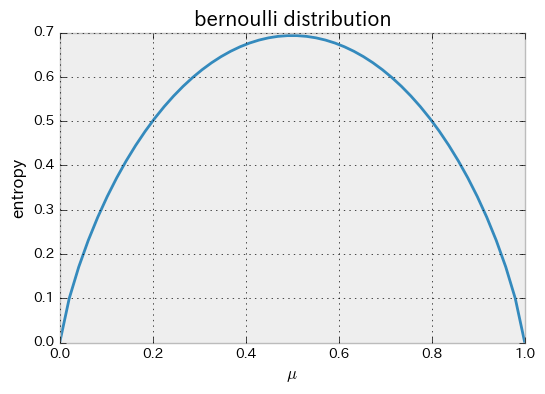

In [1]:
#scipy.stats.bernoulli.entropyを用いた実装
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
plt.style.use("bmh")

mu_ber = np.linspace(0, 1)
ent_ber = bernoulli.entropy(mu_ber)
plt.plot(mu_ber, ent_ber)
plt.xlabel("$\mu$")
plt.ylabel("entropy")
plt.title("bernoulli distribution")
plt.show()

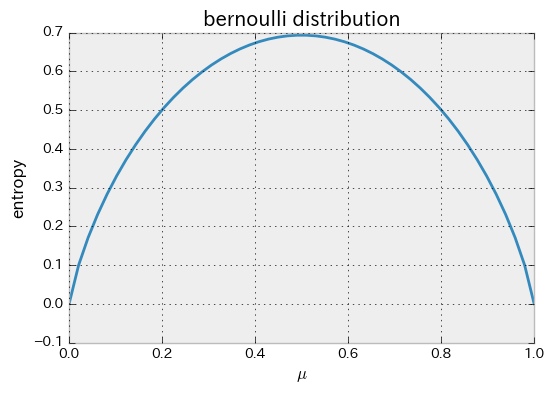

In [4]:
#自作関数を用いた実装
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
plt.style.use("bmh")

def bernoulli_entropy(mu):
    #np.logにおいて0落ちを防ぐために1e-6
    return -mu_ber*np.log(mu_ber+1e-6)-(1-mu_ber)*np.log(1-mu_ber+1e-6)

mu_ber = np.linspace(0, 1)
ent_ber = bernoulli_entropy(mu_ber)
plt.plot(mu_ber, ent_ber)
plt.xlabel("$\mu$")
plt.ylabel("entropy")
plt.title("bernoulli distribution")
plt.show()

## 2.2.2　二項分布

ベルヌーイ分布では１回のコイントスに対する表裏の確率分布を表現しました．ここで，同様の試行を$\ M\ $回繰り返した場合に拡張してみます．コイントスを$\ M\ $回行ったあとの表が出た回数$\ m\in\{0,1,...,M\}\ $に関する確率分布は次のように定義され，二項分布（Binomial distribution）と呼ばれています．

$$ \mathrm{Bin}(m \mid M,\mu) =\ _M \mathrm{C}_m \mu^m(1-\mu)^{M-m}$$

パラメータ$\ M\ $および$\ \mu\ $にいろいろな値を設定して分布の形状を確認してみましょう．

In [12]:
#可視化メソッドの定義
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

def visual_binom(M_mu):
    """
    二項分布を複数可視化
    Args:
        M_mu:[[試行回数, パラメータ],...]の二重配列
    """
    def vis_bin(m_mu):
        """
        二項分布の可視化
        Args:
            m_mu:[試行回数, パラメータ]の配列
        """
        x = range(m_mu[0]+1)
        y = []
        for m in x:
            y.append(binom.pmf(m, m_mu[0], m_mu[1]))  #m回表がでる確率
        plt.bar(x, y, align="edge")
        plt.xlim(0, 20)
        plt.xticks(np.arange(0, 21, 5))
        plt.ylim(0, 0.35)
        plt.title("M=" + str(m_mu[0]) + ", $\mu$=" + str(m_mu[1]), fontsize=10)
        plt.xlabel("m")
        plt.ylabel("probability")
        
    plt.figure(figsize=(20,4))
    for i in range(len(M_mu)):
        plt.subplot(1, len(M_mu), i+1)
        vis_bin(M_mu[i])

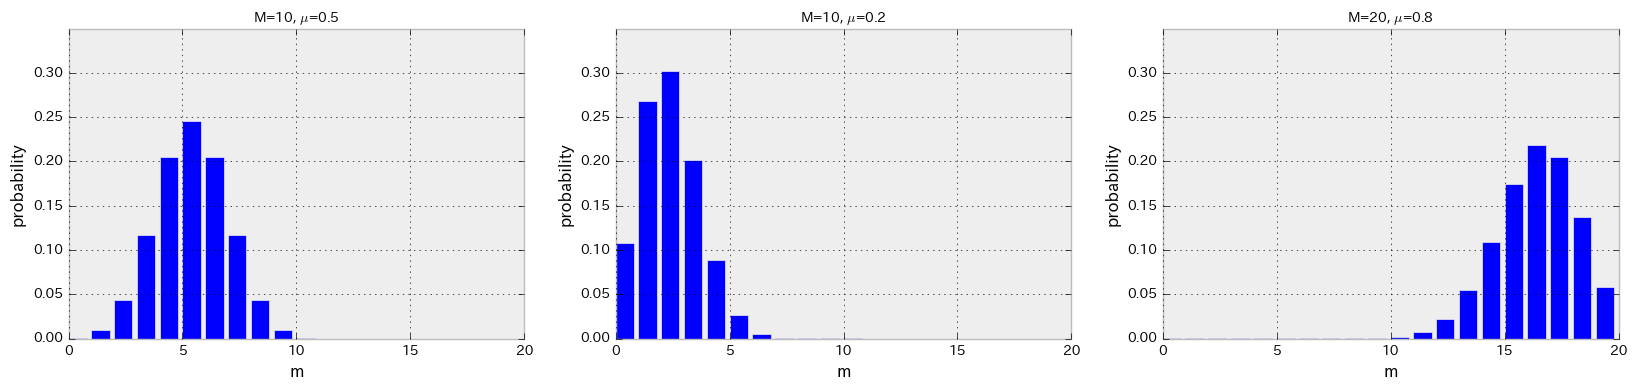

In [13]:
#実行
visual_binom([[10, 0.5], [10, 0.2], [20, 0.8]])

二項分布の期待値は次の通りです。

$$＜m＞ = M\mu$$


(期待値の証明）

$i$ 回目に当たったときに 1，当たらないときに 0 を取る確率変数を$X_i$ とおくと，<br>
$X=X_1+X_2+⋯+X_n$ であり，期待値の線形性から<br>
$E[X]=E[X_1]+E[X_2]+⋯+E[X_n]$<br>
右辺の各項はいずれも当たる確率 $p$ と等しいので E[X]=np となる。

In [14]:
def binom_ex(m_mu):
    """
     Args:
            m_mu:[試行回数, パラメータ]の配列
    """
    return m_mu[0]*m_mu[1]

In [16]:
M_mu = [[10, 0.5], [10, 0.2], [20, 0.8]]

[binom_ex(m_mu) for m_mu in M_mu]   #二項分布の形状と照らし合わせて確認してみましょう

[5.0, 2.0, 16.0]

## 2.2.3　カテゴリ分布

　今度は，ベルヌーイ分布をより一般的な$\ K\ $次元の確率分布に拡張してみましょう．$\ \mathrm{\mathbf{s}}\ $を$\ K\ $次元ベクトルとし，それぞれの要素が$\ s_k \in \{0,1\}\ $，かつ$\ \sum_{k=1}^{K}s_k=1\ $を満たすとします．サイコロで例えるならば，例えば５の出目を$\ \mathrm{\mathbf{s}}=(0,0,0,0,1,0)^{\mathrm{T}}\ $というように表現できます．
<br>次式で定義される$\ \mathrm{\mathbf{s}}\ $上の確率分布を**カテゴリ分布（categorical distribution）**と呼びます．

$$\mathrm{Cat}(\mathrm{\mathbf{s}} \mid \boldsymbol{\pi}) = \prod_{k=1}^{K}{\pi_{k}}^{s_{k}}$$

ここで$\ \boldsymbol{\pi} = (\pi_1,...,\pi_K)$は分布を決める$\ K\ $次元のパラメータで，$\ \pi_k \in (0,1)\ $かつ$\ \sum_{k=1}^{K}{\pi_k} = 1\ $を満たすように設定する必要があります．例えば$\ K=6\ $とし，すべての$\ k\ $に対して$\ \pi_k = 1/6\ $とおけば，一様な６面のサイコロの出目に関する分布を表現することができます．

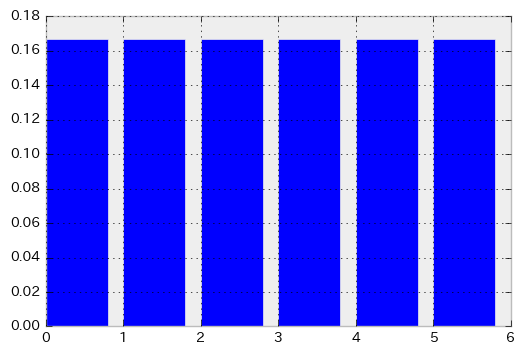

In [19]:
vec = [1/6,1/6,1/6,1/6,1/6,1/6,]
plt.bar(range(len(vec)),vec)
plt.show()

期待値計算も基本的にベルヌーイ分布と同様です
$$＜s_k＞=\pi_k$$

カテゴリ分布のエントロピーは次にように計算できます。
#### $$\begin{align}
H[Cat(x|\mu)]&=-＜ln\ Cat(x|\mu)＞\\
&=-＜\sum_{k=1}^K s_k\ ln\ \pi_k＞\\
&=-\sum_{k=1}^K＜s_k＞\ ln\ \pi_k\\
&=-\sum_{k=1}^K\pi_k\ ln\ \pi_k\\
\end{align}\tag{1}$$

## 2.2.4　多項分布

　ベルヌーイ分布，二項分布，カテゴリ分布と紹介しましたが、実はこれらの分布はすべてこれから紹介する**多項分布（multinomial distribution）**の特殊な場合とみることができます．アイデアとしてはベルヌーイ分布から二項分布に拡張した場合と同じで，カテゴリ分布における試行を$\ M\ $回繰り返したあとの$\ k\ $番目の事象に関する出現回数$\ m_k\ $の分布を考えます．
<br>多項分布は，次のように定義されます．

$$\mathrm{Mult}(\mathrm{\mathbf{m}} \mid \boldsymbol{\pi},M) = M! \prod_{k=1}^{K}\frac{{\pi_k}^{m_k}}{m_k!}$$

ここで$\ \mathrm{\mathbf{m}}\ $は$\ K\ $次元ベクトルであり，$\ m_k\ $が$\ k\ $番目の事象が出た回数を表すことになります．つまり，$\ m_k \in \{0,1,...,M\}\ $かつ$\ \sum_{k=1}^{K}m_k = M\ $を満たします．パラメータ$\ \boldsymbol{\pi}\ $についてはカテゴリ分布の場合と同様です．イメージがつきづらいと思うので$\ M\ $, $\ \boldsymbol{\pi}\ $の設定を色々変えてグラフを描画してみましょう．

### scipyを用いた実装

In [118]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("bmh")

def visual_multinomial(M, pi):
    """
    多項分布の可視化(scipy実装)
    Args:
        M:試行回数
        pi:確率ベクトル
    """
    _x = _y = range(M)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    # 座標が生じ得ない部分(M＝５の際(4,5)など)の削除
    cond = (x+y)<=M
    x = x[cond]
    y = y[cond]
    
    # 多項分布の定義
    rv = multinomial(M, pi)
    
    #生起確率(高さ)
    top=[]
    for a,b in zip(x,y):
        top.append(rv.pmf([a, b, M-a-b]))
    
    #底
    bottom = np.zeros_like(top)
    
    width = depth = 1

    # 可視化
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("M =" + str(M) + ", " + "$\pi =$" + str(pi), fontsize=10)

    ax.bar3d(x, y, bottom, width, depth, top)

    plt.xlim(0, 10)
    plt.ylim(0, 10)

    ax.set_zlim3d(bottom=0, top=0.2)
    ax.set_zticks(np.arange(0, 0.21, 0.05))

    plt.show()

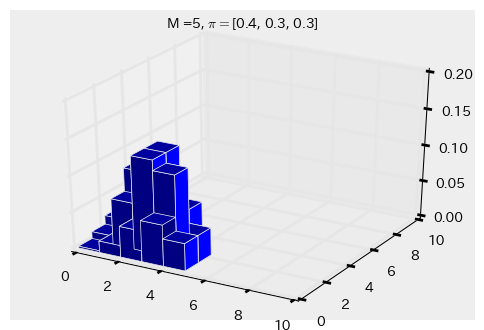

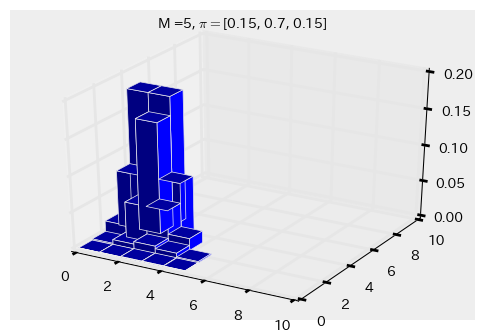

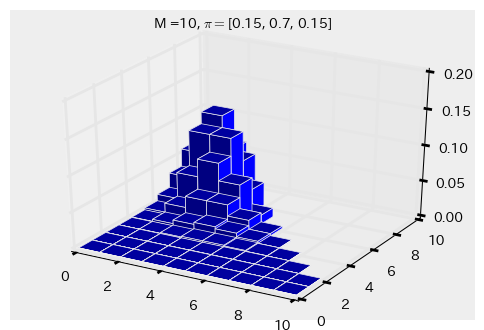

In [119]:
#実行
visual_multinomial(5, [0.4, 0.3, 0.3])
visual_multinomial(5, [0.15, 0.7, 0.15])
visual_multinomial(10, [0.15, 0.7, 0.15])

### 自作関数による実装

In [152]:
#可視化メソッドの定義
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("bmh")

def visual_multinomial2(M, pi):
    """
    多項分布の可視化(scipy実装)
    Args:
        M:試行回数
        pi:確率ベクトル
    """
    _x = _y = range(M)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    # 座標が生じ得ない部分(M＝５の際(4,5)など)の削除
    cond = (x+y)<=M
    
    x = x[cond]
    y = y[cond]
    
    #多項分布の定義
    def multinomial_pmf(m, M, pi): 
        """
        定義式の実装
        Args:
            m:事象の生起回数の配列 
            M:試行回数
            pi:確率ベクトル
        """
        return math.factorial(M) * np.prod([(pi_k**m_k) / math.factorial(m_k) for pi_k,m_k in zip(pi,m)] )
                                          
    #生起確率(高さ)
    top=[]
    for a,b in zip(x,y):
        top.append(multinomial_pmf([a, b, M-a-b],M,pi))
    
    #底
    bottom = np.zeros_like(top)
    
    width = depth = 1

    # 可視化
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("M =" + str(M) + ", " + "$\pi =$" + str(pi), fontsize=10)

    ax.bar3d(x, y, bottom, width, depth, top)

    plt.xlim(0, 10)
    plt.ylim(0, 10)

    ax.set_zlim3d(bottom=0, top=0.2)
    ax.set_zticks(np.arange(0, 0.21, 0.05))

    plt.show()

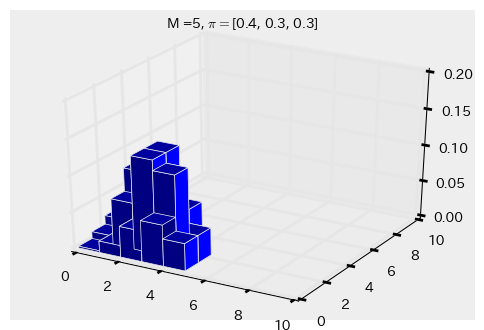

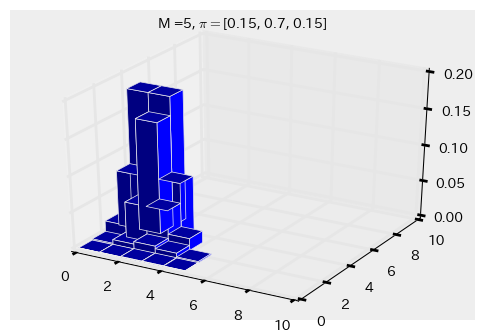

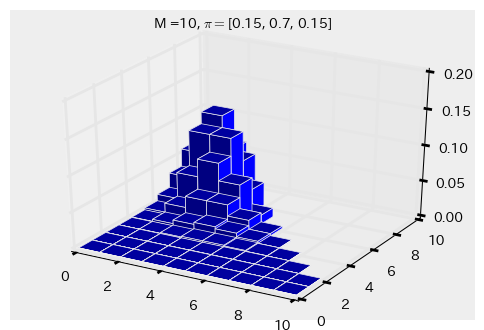

In [153]:
#実行
visual_multinomial2(5, [0.4, 0.3, 0.3])
visual_multinomial2(5, [0.15, 0.7, 0.15])
visual_multinomial2(10, [0.15, 0.7, 0.15])

## 2.2.5　ポアソン分布

　**ポアソン分布（Poisson distribution）**は非負の整数を生成するための確率分布で，次のように定義されます．

$$\mathrm{Poi}(x \mid \lambda) = \frac{\lambda^x}{x!}e^{-\lambda}$$


ポアソン分布は主に「ランダムに起きる事故・病気の発症」などにおいて「特定の期間中に何回起こる確率が何%あるのか」を表す

例：1年あたり平均0.61人の兵士が馬に蹴られて死ぬ軍隊において、「1年に何人の兵士が馬に蹴られて死ぬかの確率の分布」を求める。

期待値は
$$＜x＞=\lambda$$



$\ \lambda \in \mathbb{R}^+\ $はポアソン分布の形状を決めるためのパラメータです．
<br>パラメータ$\ \lambda\ $にいろいろな値を設定して，ポアソン分布のふるまいを確認してみましょう．

In [124]:
#可視化メソッドの定義
import matplotlib.pyplot as plt
from scipy.stats import poisson
plt.style.use("bmh")
%matplotlib inline

def visual_poisson(lam):
    def vis_poi(la):
        x = range(0, 13)
        y = poisson.pmf(x, la)
        plt.bar(x, y, align="edge")
        plt.xlim(0, 12)
        plt.xticks(np.arange(0, 13, 2))
        plt.title("$\lambda =$"+str(la), fontsize=10)
        plt.xlabel("x")
        plt.ylabel("probability")
    plt.figure(figsize=(20,4))
    for i in range(len(lam)):
        plt.subplot(1, len(lam), i+1)
        vis_poi(lam[i])

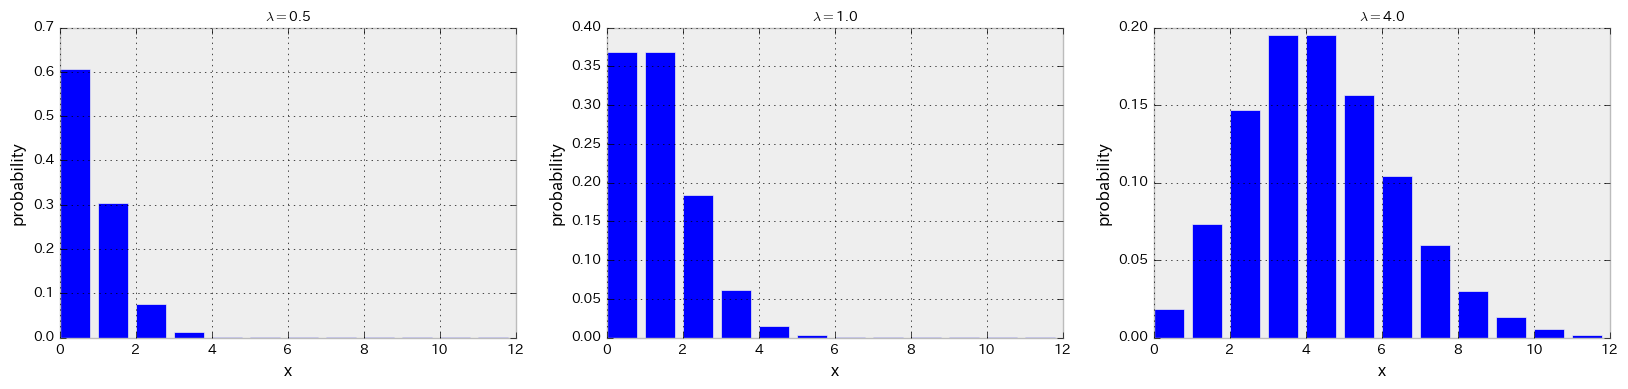

In [125]:
#実行
visual_poisson([0.5, 1.0, 4.0])

### 自作関数による実装

In [147]:
def visual_poisson2(lam):
    def vis_poi(la):
        x = range(0, 13)
        
        #-------自作------
        def poisson_pmf(x_,la):
            return np.power(la, x_)/math.factorial(x_)*np.power(math.e,-la)
        y = [poisson_pmf(_,la) for _ in x]
        #-------------
        
        plt.bar(x, y, align="edge")
        plt.xlim(0, 12)
        plt.xticks(np.arange(0, 13, 2))
        plt.title("$\lambda =$"+str(la), fontsize=10)
        plt.xlabel("x")
        plt.ylabel("probability")
    plt.figure(figsize=(20,4))
    
    for i in range(len(lam)):
        plt.subplot(1, len(lam), i+1)
        vis_poi(lam[i])

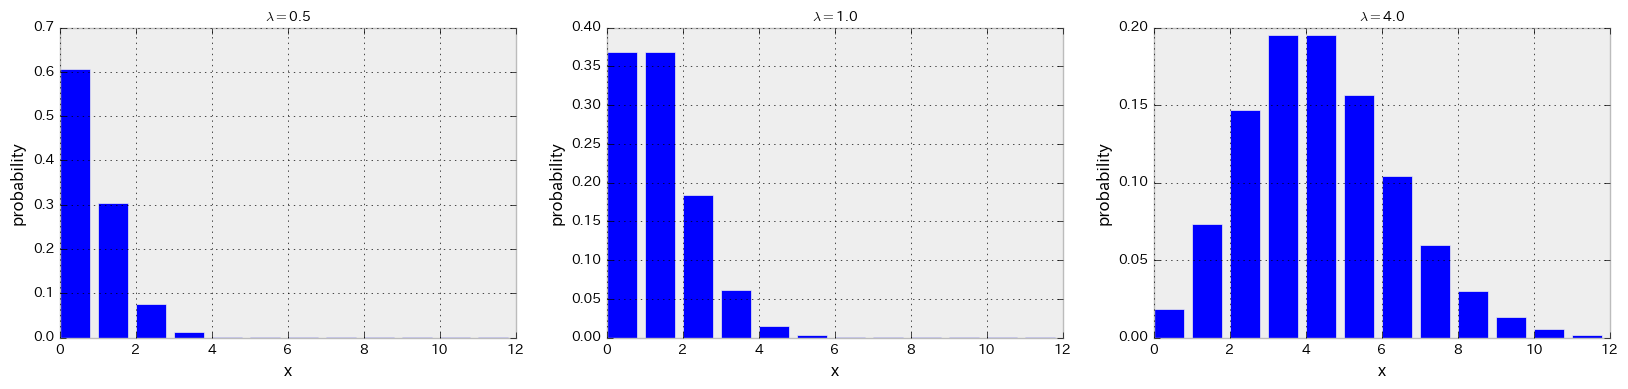

In [148]:
#実行
visual_poisson2([0.5, 1.0, 4.0])

ポアソン分布は、例えば「30分に平均2回電話がかかって来るコールセンターにおいて、1時間に6回電話がかかって来る確率」を求めるのに便利な分布です。

 
この場合、求めたいのは「1時間に6回電話がかかって来る確率」なので「単位時間は1時間」・「**x＝6回**」となります。

 

λは単位時間あたりの平均生起回数なので「30分に平均2回」→「1時間に平均4回」から「**λ＝4**」となります。

 

λとkが求まったら、この「λ＝4」と「x＝6」を先ほどの数式に代入してみましょう。


 

In [149]:
 def poisson_pmf(x_,la):
            return np.power(la, x_)/math.factorial(x_)*np.power(math.e,-la)
        
poisson_pmf(6,4)

0.10419563456702115